In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from scipy import stats

read the dataset 

In [2]:
dataset_path = '/Volumes/Code/RedWineQuality/Data/Red Wine Quality.csv'
df = pd.read_csv(dataset_path)

Display first few cells

In [3]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Basic Understanding of Data

In [4]:
print(f"Dataset info:\n {df.info()}")
print(f"Summary stats:\n {df.describe()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Dataset info:
 None
Summary stats:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.00000

Checking for missing values

In [5]:
print(f'total missing values are:\n{df.isnull().sum()}')
# Data has no missing values

total missing values are:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Checking for Outliers using boxplot 


plt.figure(figsize=(15,12))<br>
df.boxplot(color=dict(boxes='red', whiskers='purple', medians='blue', caps='blue'))<br>
plt.xticks(rotation = 90)<br>
plt.title('Boxplot of dataset')<br>
t.show()


Melting df to use it in seaborn

In [6]:
df_melted = df.melt(var_name='Variable', value_name='Value')

Generating  a box plot 

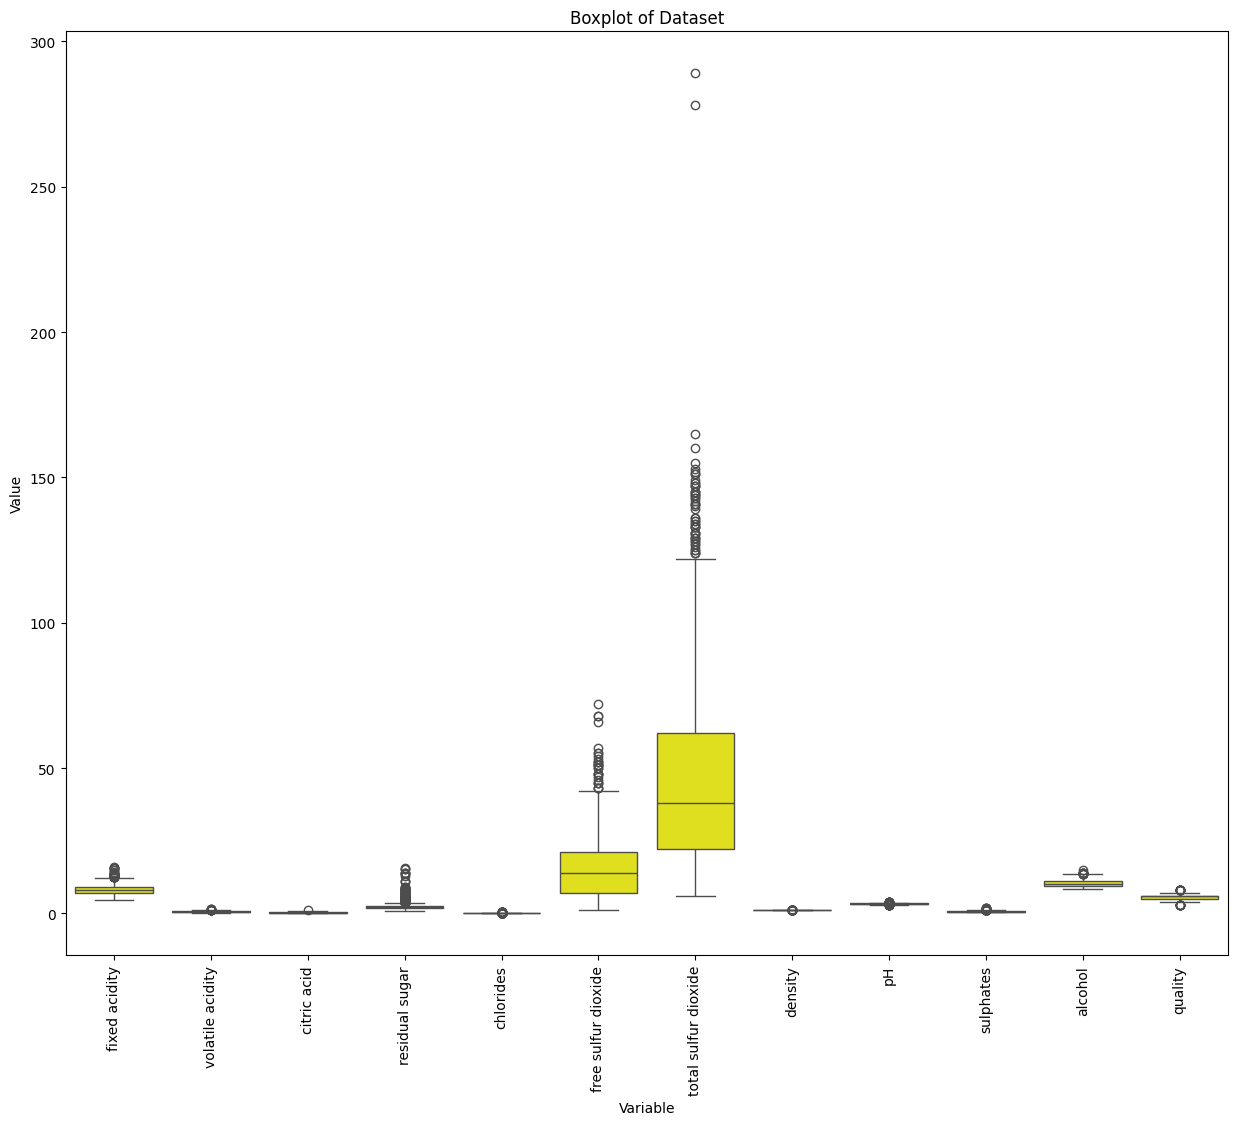

In [7]:
plt.figure(figsize=(15, 12))
sns.boxplot(x='Variable', y='Value', data=df_melted, color='yellow')
plt.xticks(rotation=90)
plt.title('Boxplot of Dataset')
plt.show()

Handling outliers

In [8]:
z_score = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
df_clean = df[(z_score < 3).all(axis=1)]
print(f"\nNumber of rows after outlier removal: {df_clean.shape[0]} (original: {df.shape[0]})")


Number of rows after outlier removal: 1451 (original: 1599)


Feature Engineering 

In [9]:
df_clean = df_clean.copy() # Ensure df_clean is a copy to avoid warnings
df_clean.loc[:, 'total acidity'] = df_clean['fixed acidity'] + df_clean['volatile acidity']
df_clean.loc[:, 'sulphates_squared'] = df_clean['sulphates'] ** 2
df_clean.loc[:, 'citric_acid_ratio'] = df_clean['citric acid'] / df_clean['fixed acidity']
df_clean.loc[:, 'sugar_acid_diff'] = df_clean['residual sugar'] - df_clean['fixed acidity']
df_clean.loc[:, 'Quality'] = df_clean['quality']

Drop the original column

In [10]:
df_clean = df_clean.drop('quality', axis=1)

In [11]:
print(df_clean)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Generate scatter plots for all features against the 'quality'

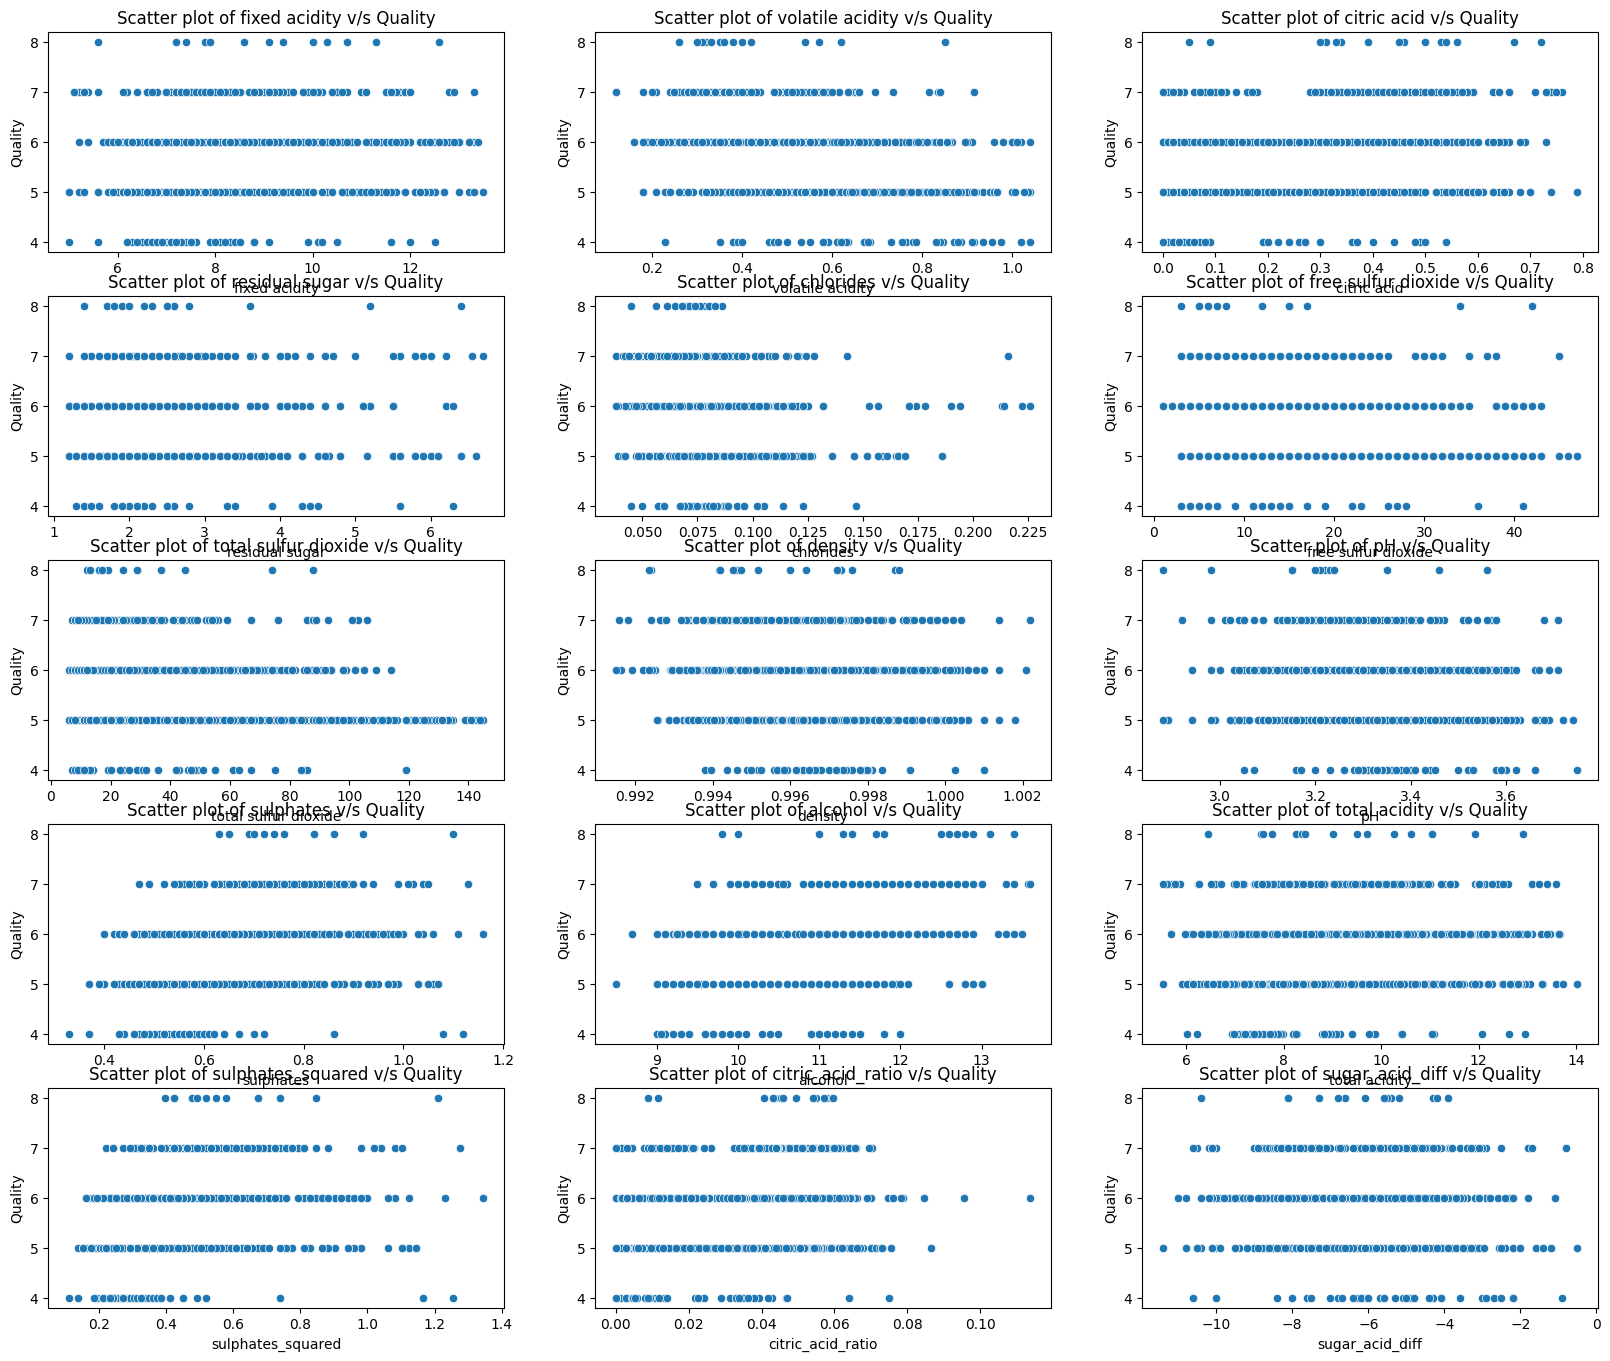

In [19]:
plt.figure(figsize=(20,20))
for i, column in enumerate(df_clean.columns[:-1]): # to exclude quality column
    plt.subplot(6,3,i+1)
    sns.scatterplot(x=df_clean[column],y=df_clean['Quality'])
    plt.title(f'Scatter plot of {column} v/s Quality')
    plt.xlabel(column)
    plt.ylabel('Quality')

In [13]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Analysing variables affecting quality of wine

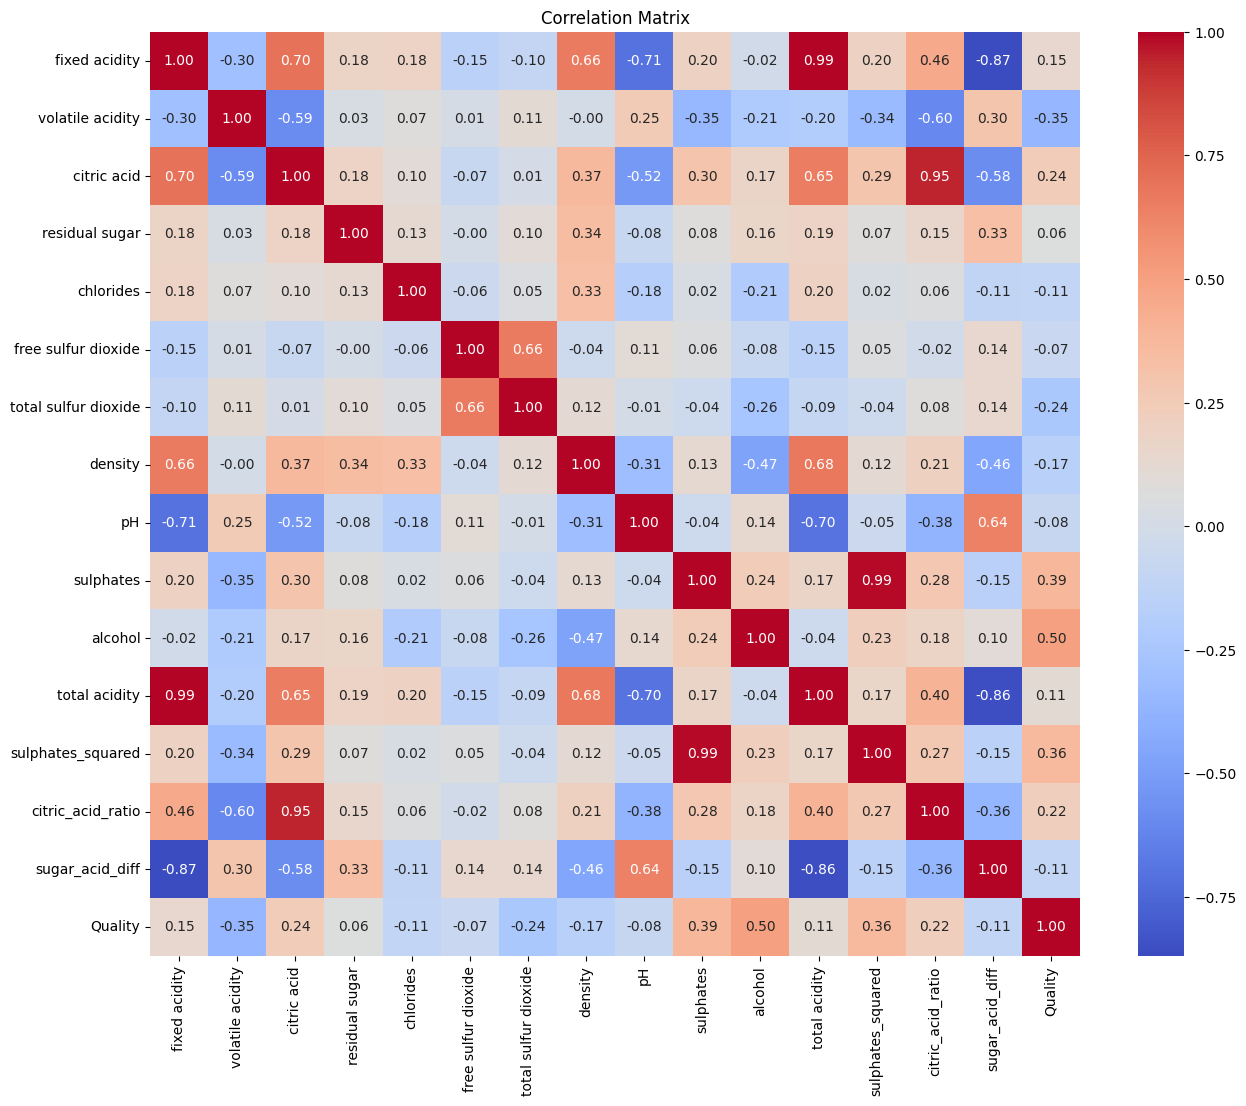

In [20]:
coor_mat = df_clean.corr()
plt.figure(figsize=(15,12))
sns.heatmap(data=coor_mat, annot=True,cmap='coolwarm',fmt ='.2f')
plt.title('Correlation Matrix')
plt.show()

To save the preprossed data for building a model

In [15]:
df_clean.to_csv('/Volumes/Code/RedWineQuality/Data/Preprocessed_RedWineQuality.csv')